In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
data.shape

(545, 13)

# Analysing the data

In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
for i in data.columns:
    print(i)

price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
print('Statistical Summury for Numerical Columns: ')
data.describe()

Statistical Summury for Numerical Columns: 


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [14]:
print('Statistical Summury for Categorical Columns: ')
data.describe(include='object')

Statistical Summury for Categorical Columns: 


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [15]:
data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [16]:
# data.describe(include=np.number)

# Checking Missing Data

In [17]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
data.isnull().sum()/len(data)*100

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

# Unique Data

In [19]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [20]:
data.bedrooms.unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [21]:
data.price.unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [22]:
data.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [23]:
data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [24]:
numerical_data = data.select_dtypes(include=np.number).columns
# numerical_data

for col in numerical_data:
    print(data[col].value_counts())
    print('\n')
    print('--------------------------------------------------------------')

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64


--------------------------------------------------------------
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64


--------------------------------------------------------------
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


--------------------------------------------------------------
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


--------------------------------------------------------------
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


--------------------------------------------------------------
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [25]:
categorical_data = data.select_dtypes(include='object').columns
# categorical_data

for col in categorical_data:
    print(data[col].value_counts())
    print('\n')
    print('--------------------------------------------------------------')

mainroad
yes    468
no      77
Name: count, dtype: int64


--------------------------------------------------------------
guestroom
no     448
yes     97
Name: count, dtype: int64


--------------------------------------------------------------
basement
no     354
yes    191
Name: count, dtype: int64


--------------------------------------------------------------
hotwaterheating
no     520
yes     25
Name: count, dtype: int64


--------------------------------------------------------------
airconditioning
no     373
yes    172
Name: count, dtype: int64


--------------------------------------------------------------
prefarea
no     417
yes    128
Name: count, dtype: int64


--------------------------------------------------------------
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


--------------------------------------------------------------


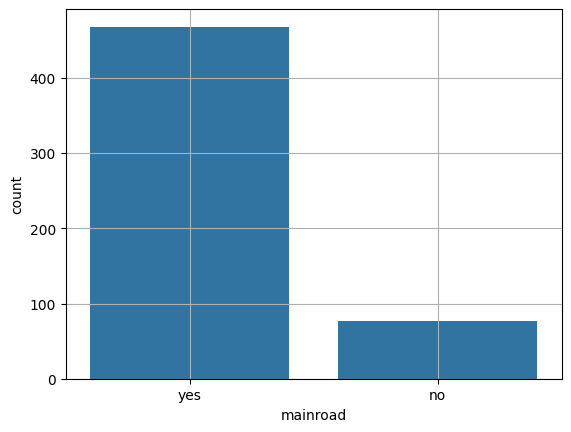

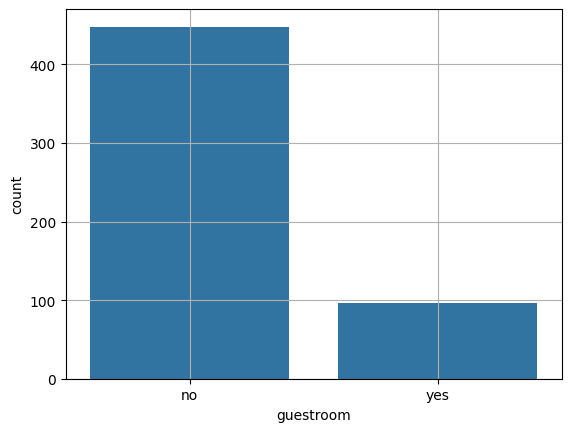

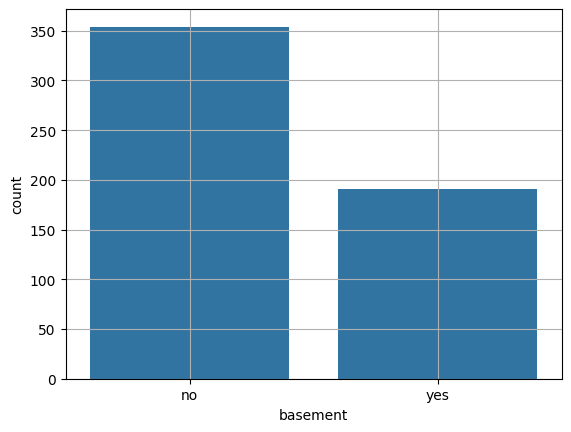

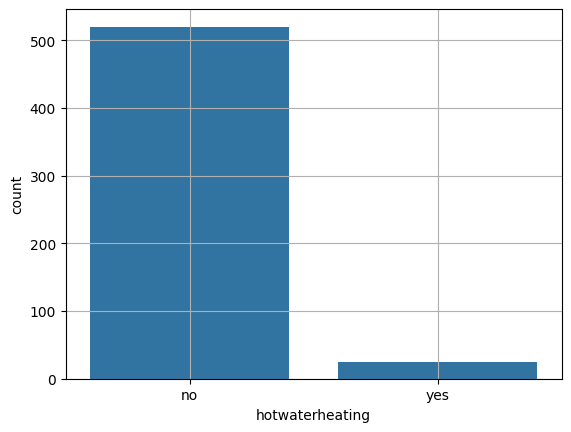

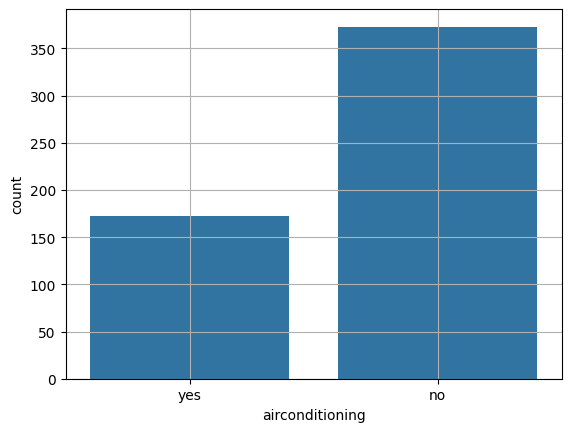

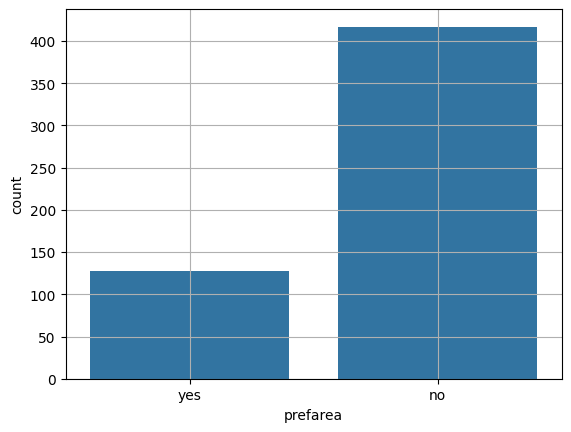

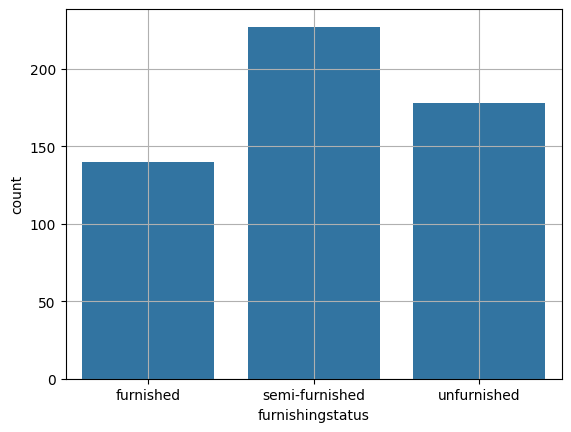

In [26]:
categorical_data = data.select_dtypes(include='object').columns
# categorical_data

for col in categorical_data:
    sns.countplot(data=data, x=col)
    plt.grid()
    plt.show()

# Create a function to do multiple tasks

In [27]:
def attribute_info(df_feature):
    
    print('Description of Feature: ', '\n')
    print(df_feature.describe(), '\n')
    
    print('Value Counts of Feature: ', '\n')
    print(df_feature.value_counts(), '\n')
    
    print('Unique Values of Feature: ', '\n')
    print(df_feature.unique(), '\n')
    
    print('Missing Values of Feature: ', '\n')
    print(df_feature.isnull().sum(), '\n')
    
    print('Missing Values of Feature in %: ', '\n')
    print(df_feature.isnull().sum()/len(df_feature)*100, '\n')

In [28]:
# attribute_info(data['price'])

In [29]:
for column in data:
    print('\033[1m' + 'Attribute Name: ', column + '\033[0m')
    print()
    attribute_info(data[column])
    print('------------------------------------------------------------------------------------')

Attribute Name:  price

Description of Feature:  

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64 

Value Counts of Feature:  

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64 

Unique Values of Feature:  

[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000

# Data Visualization

In [30]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [31]:
data[data['area'] == 16200]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


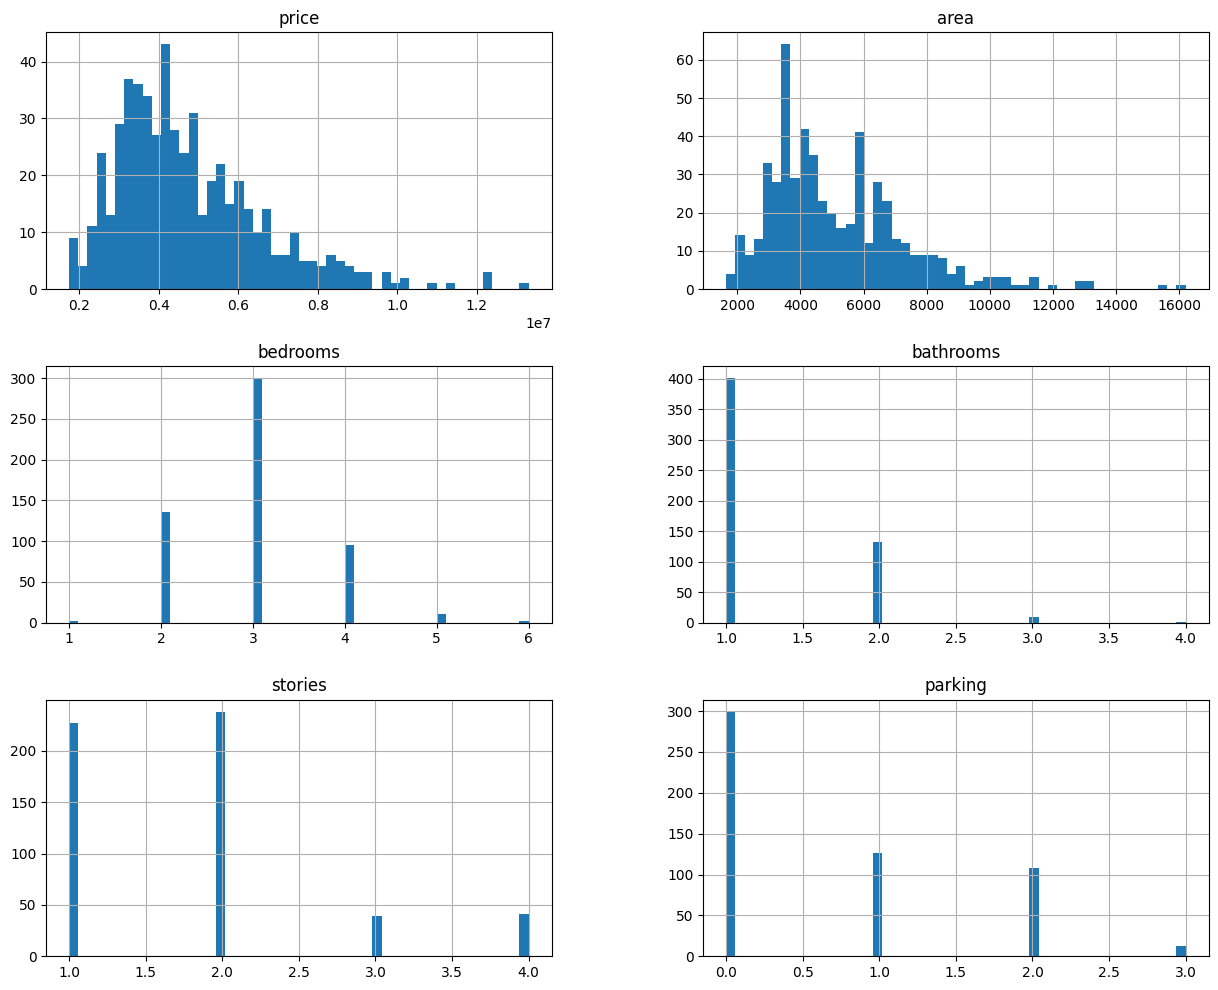

In [32]:
data.hist(figsize=(15, 12), bins=50)
plt.show()

In [33]:
data.duplicated().sum()

0

In [34]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

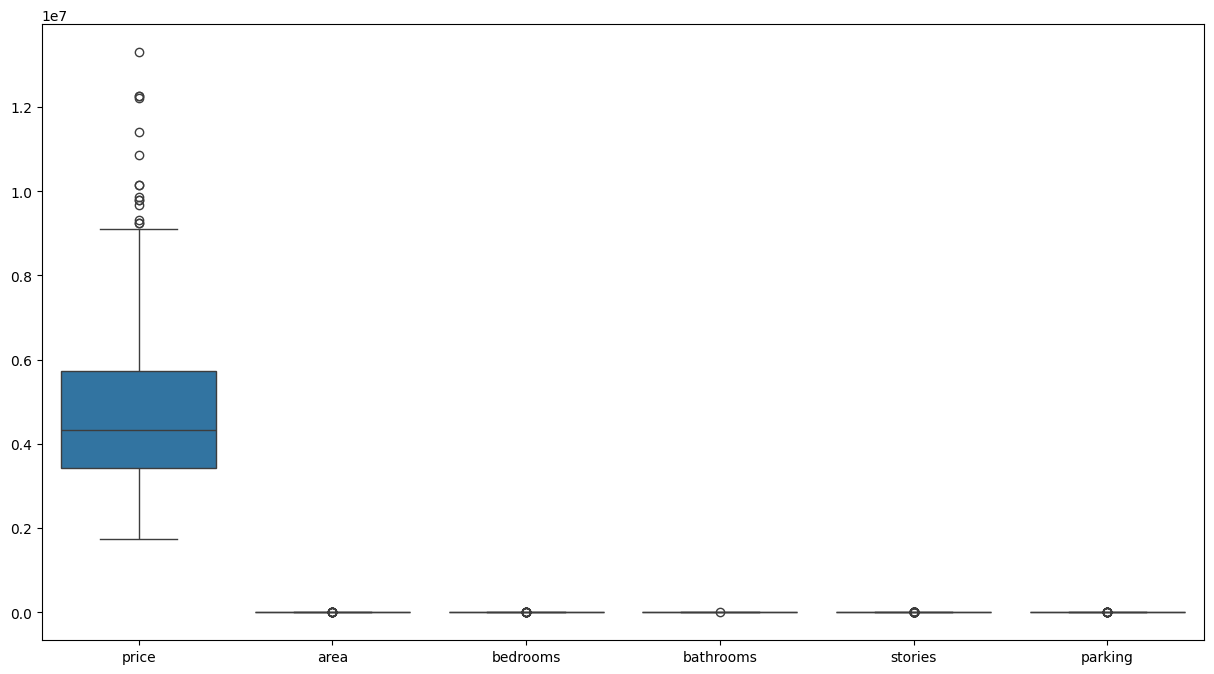

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.show()

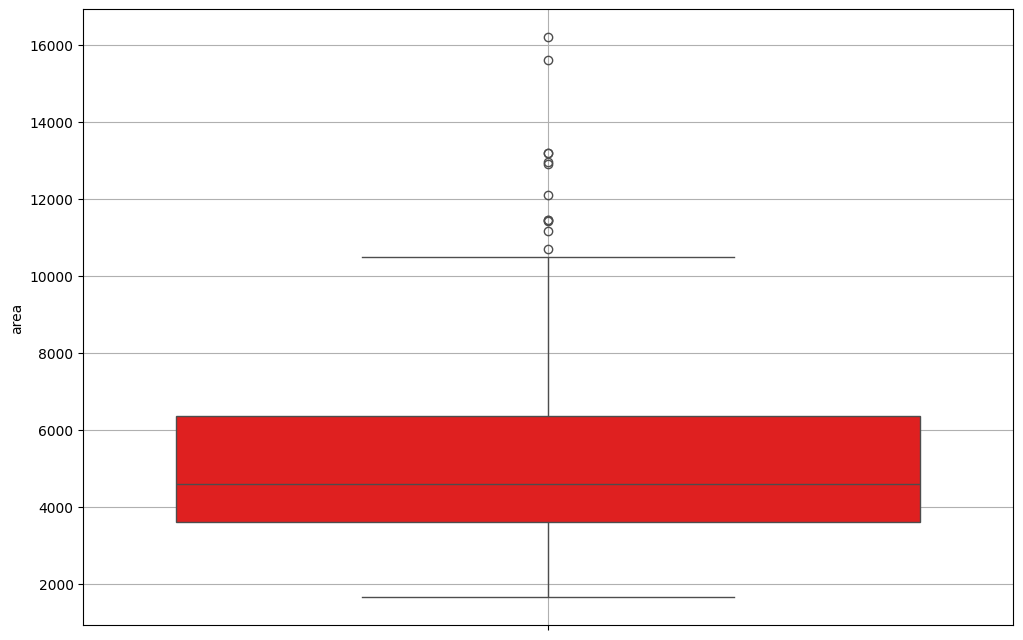

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['area'], color='r')
plt.grid()
plt.show()

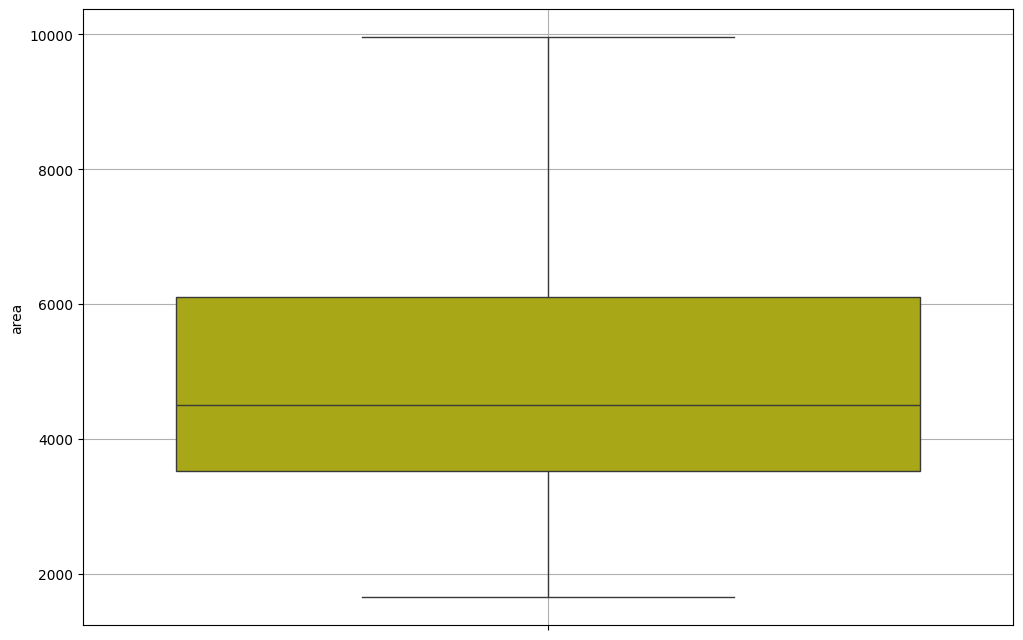

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['area'], color='y')
plt.grid()
plt.show()

In [41]:
data[data['area'] > 10000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished


In [42]:
data[data['area'] > 10000].index

Index([  7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403],
      dtype='int64')

In [43]:
data.drop(index=[7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403], inplace=True)

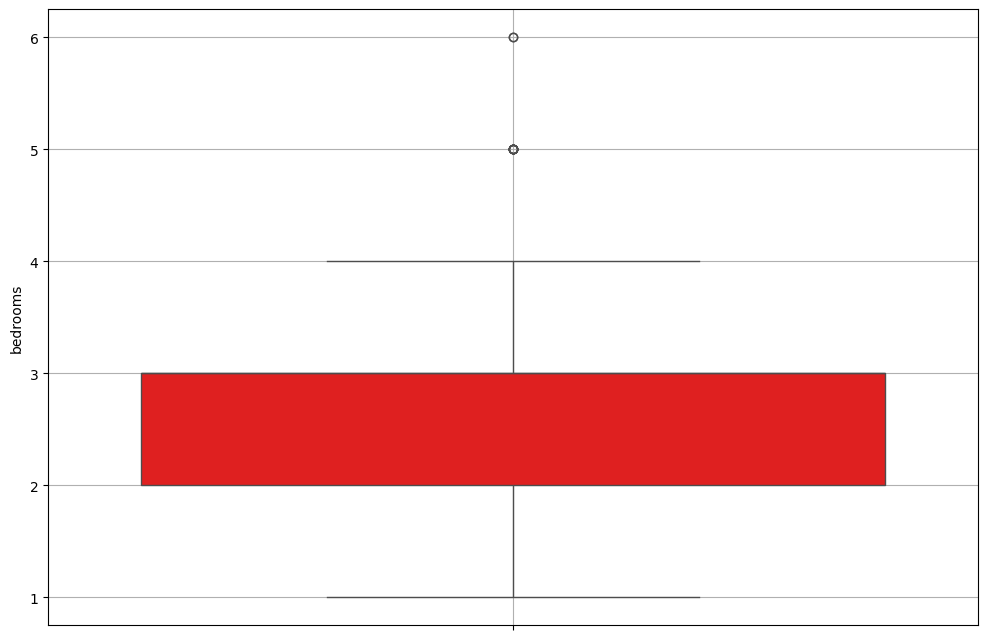

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['bedrooms'], color='r')
plt.grid()
plt.show()

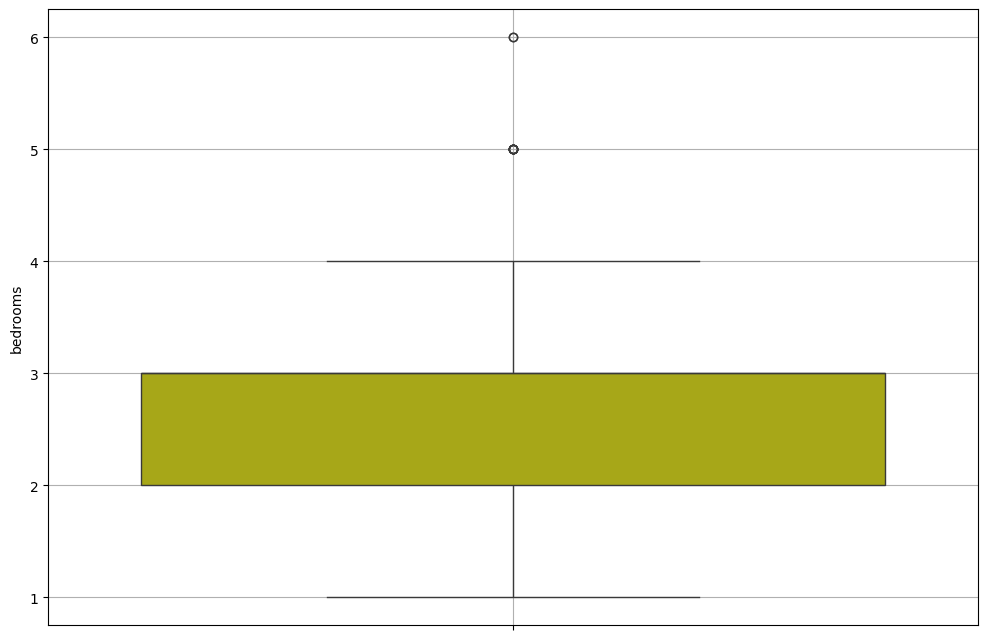

In [72]:

plt.figure(figsize=(12, 8))
sns.boxplot(data['bedrooms'], color='y')
plt.grid()
plt.show()

In [63]:
data[data['area'] > 4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [71]:
data[data['area'] > 6].index

Index([ 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
       ...
       525, 526, 527, 528, 529, 530, 531, 532, 533, 534],
      dtype='int64', length=492)

In [60]:
data.drop(index=[17,  18,  19,  20,  21,  22,  23,  24,  25,  26], inplace=True)

In [61]:
data.drop(index=[ 535, 536, 537, 538, 539, 540, 541, 542, 543, 544], inplace=True)

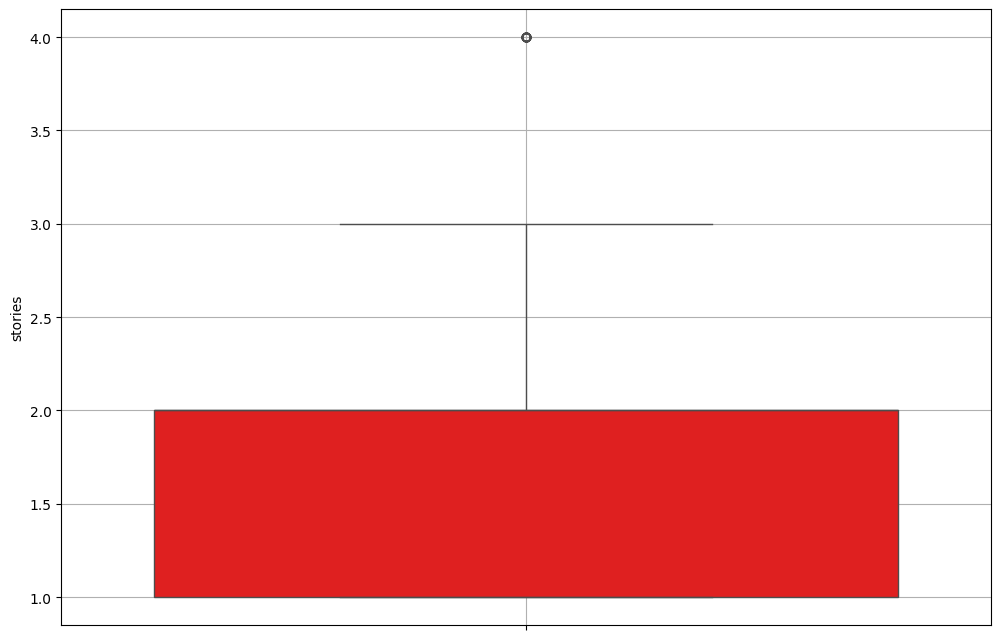

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['stories'], color='r')
plt.grid()
plt.show()

In [75]:
data[data['stories'] < 4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
32,8295000,4880,4,2,2,yes,no,no,no,yes,1,yes,furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [77]:
data[data['stories'] < 4].index

Index([ 27,  28,  29,  32,  33,  34,  36,  40,  45,  48,
       ...
       525, 526, 527, 528, 529, 530, 531, 532, 533, 534],
      dtype='int64', length=456)

In [78]:
data.drop(index=[27,  28,  29,  32,  33,  34,  36,  40,  45,  48,], inplace=True)

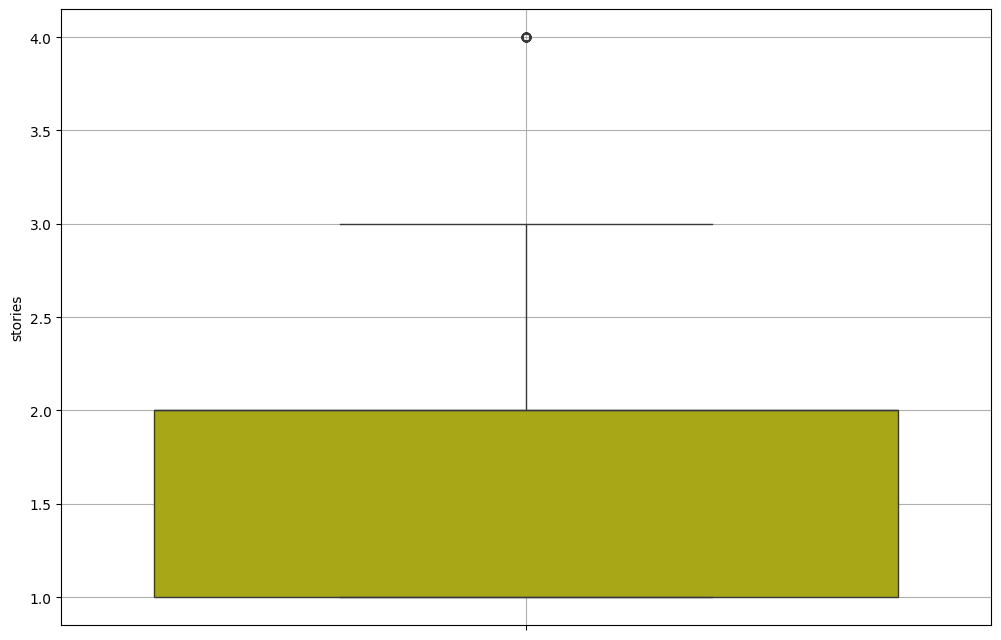

In [79]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['stories'], color='y')
plt.grid()
plt.show()

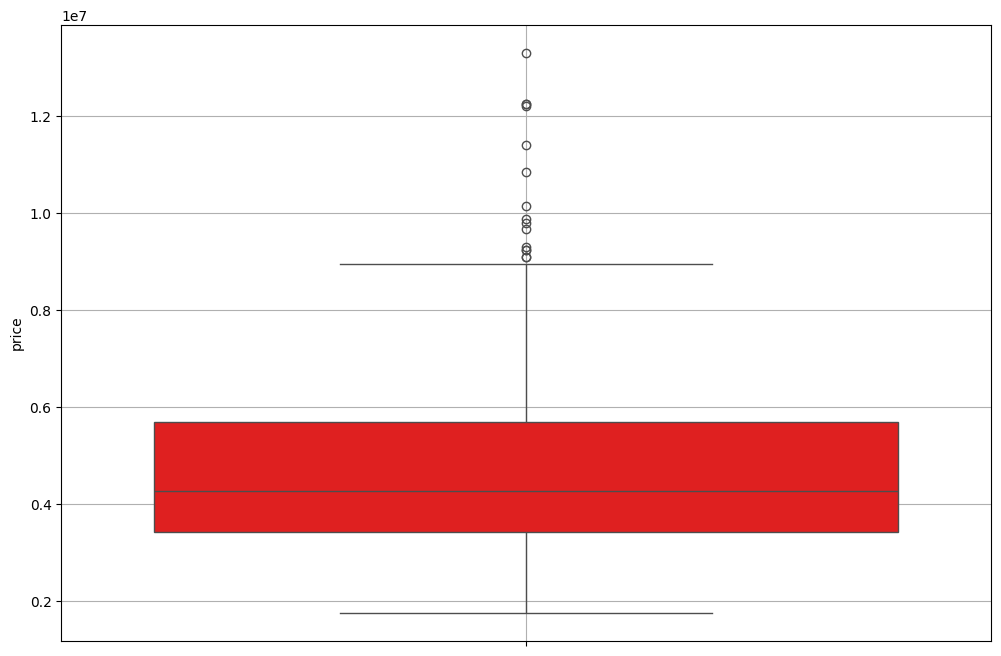

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['price'], color='r')
plt.grid()
plt.show()

In [47]:
data[data['price'] > 9000000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished


In [48]:
data[data['price'] > 9000000].index

Index([0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16], dtype='int64')

In [52]:
data.drop(index=[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16], inplace=True)

In [53]:
data.shape

(512, 13)

In [54]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


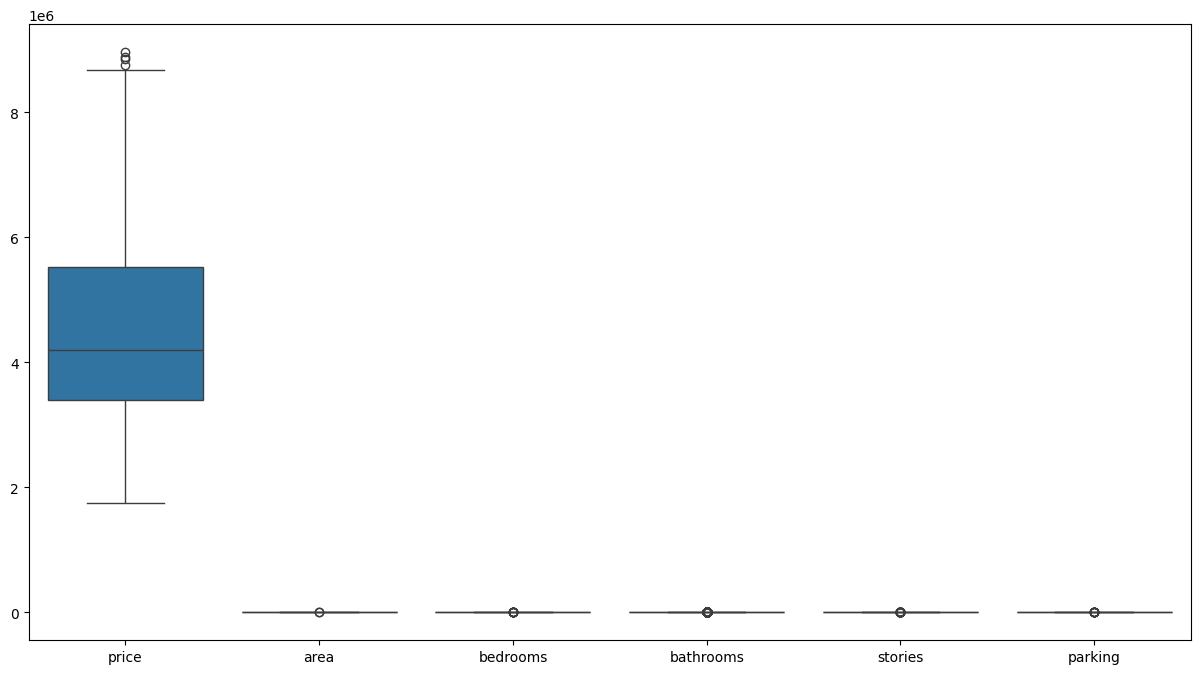

In [55]:
plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.show()

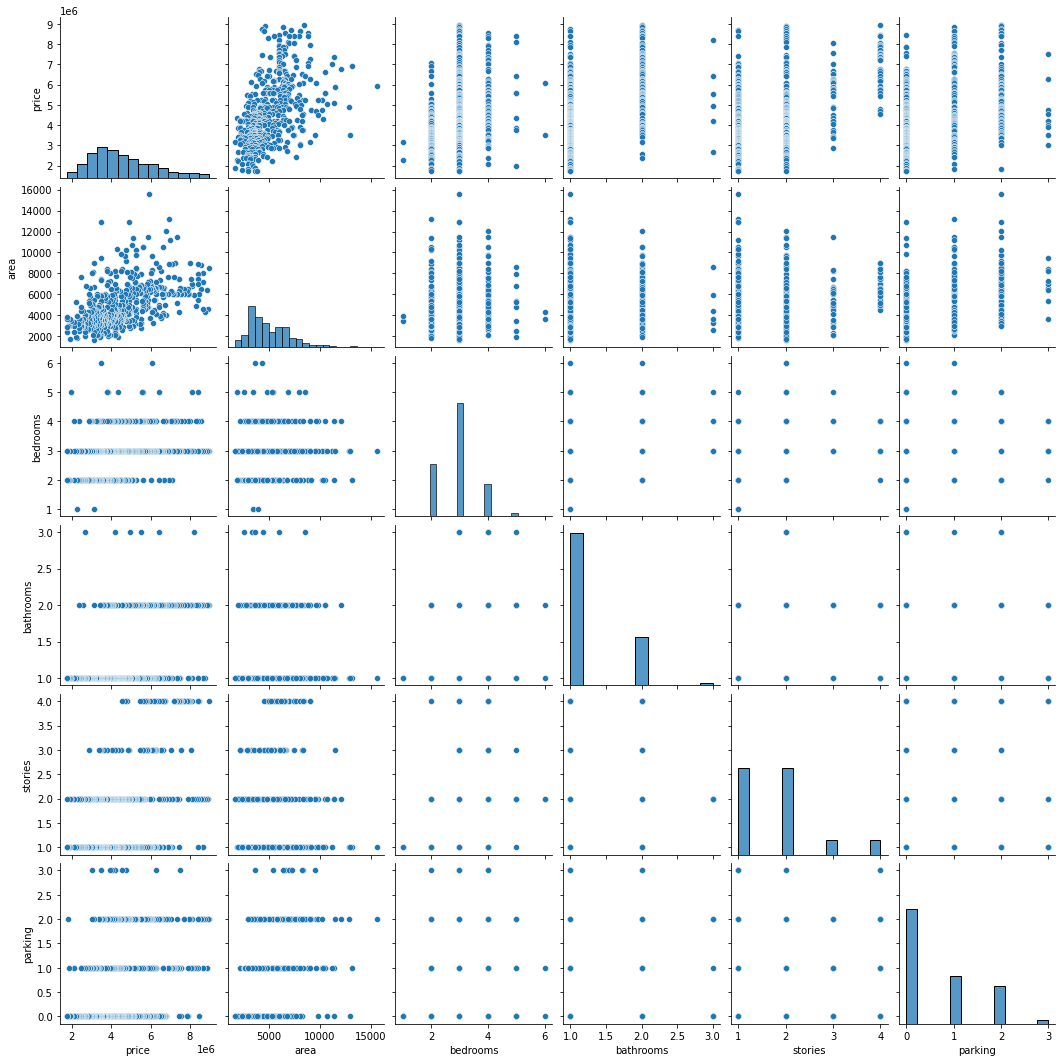

In [ ]:
sns.pairplot(data)

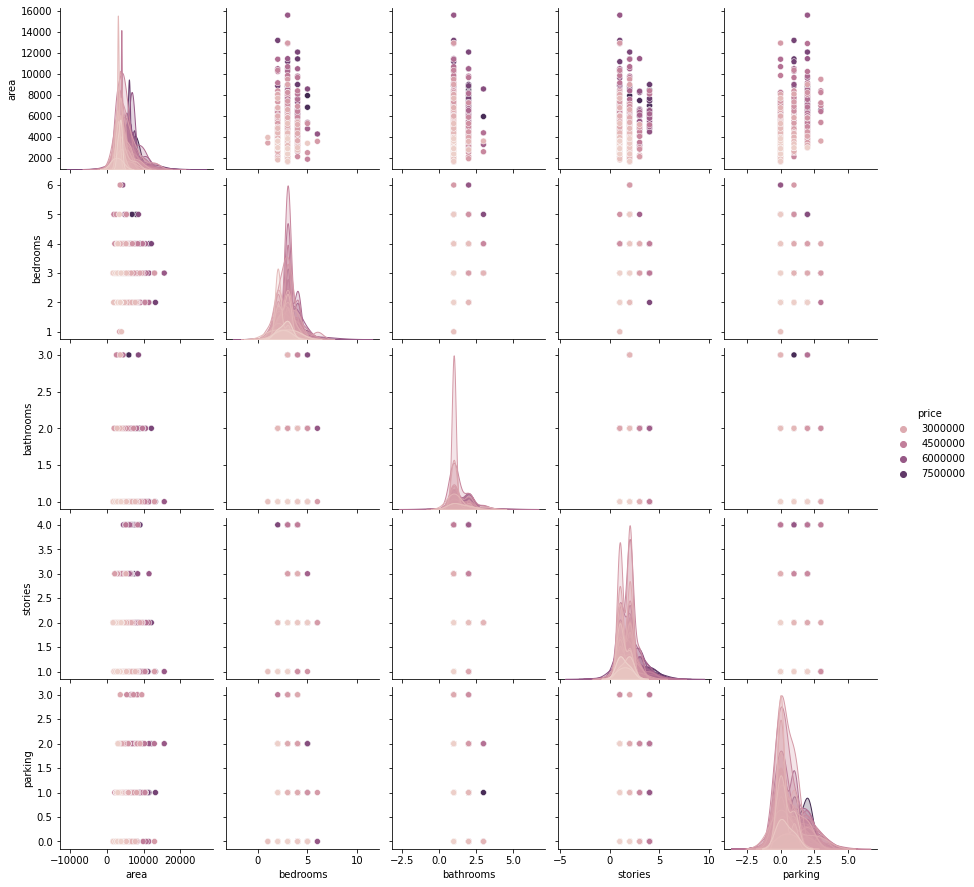

In [ ]:
sns.pairplot(data, hue='price')

# Checking the Correlation

In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

In [ ]:
df

,area,bedrooms,bathrooms,stories,parking
17,8500,3,2,4,2
18,4600,3,2,2,2
19,6420,3,2,2,1
20,4320,3,1,2,2
21,7155,3,2,1,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [ ]:
df.corr()

,area,bedrooms,bathrooms,stories,parking
area,1.000000,0.109293,0.132166,0.063436,0.343992
bedrooms,0.109293,1.000000,0.349523,0.404938,0.105479
bathrooms,0.132166,0.349523,1.000000,0.308414,0.128327
stories,0.063436,0.404938,0.308414,1.000000,0.018348
parking,0.343992,0.105479,0.128327,0.018348,1.000000


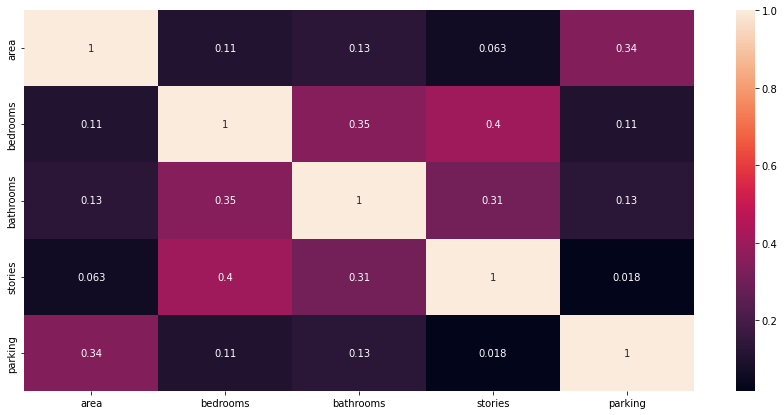

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished


In [ ]:
data['mainroad'].map({'yes':0, 'no': 1})

17     0
18     0
19     0
20     0
21     0
      ..
540    0
541    1
542    0
543    1
544    0
Name: mainroad, Length: 528, dtype: int64

In [ ]:
data['mainroad'] = data['mainroad'].map({'yes':0, 'no': 1})
data['guestroom'] = data['guestroom'].map({'yes':0, 'no': 1})
data['basement'] = data['basement'].map({'yes':0, 'no': 1})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':0, 'no': 1})
data['airconditioning'] = data['airconditioning'].map({'yes':0, 'no': 1})
data['prefarea'] = data['prefarea'].map({'yes':0, 'no': 1})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished':0, 'semi-furnished': 1, 'unfurnished':2})

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,0,1,1,1,0,2,1,0
18,8890000,4600,3,2,2,0,0,1,1,0,2,1,0
19,8855000,6420,3,2,2,0,1,1,1,0,1,0,1
20,8750000,4320,3,1,2,0,1,0,0,1,2,1,1
21,8680000,7155,3,2,1,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0


In [ ]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.511606,0.322992,0.460666,0.436585,-0.311132,-0.286746,-0.184500,-0.086425,-0.466092,0.323426,-0.290853,-0.314426
area,0.511606,1.000000,0.109293,0.132166,0.063436,-0.288688,-0.153728,-0.034291,-0.003017,-0.210648,0.343992,-0.211465,-0.172014
bedrooms,0.322992,0.109293,1.000000,0.349523,0.404938,0.027016,-0.072505,-0.093184,-0.030500,-0.145496,0.105479,-0.063184,-0.114531
bathrooms,0.460666,0.132166,0.349523,1.000000,0.308414,-0.022912,-0.141416,-0.118434,-0.040679,-0.170623,0.128327,-0.025992,-0.150056
stories,0.436585,0.063436,0.404938,0.308414,1.000000,-0.116218,-0.037742,0.168265,-0.020226,-0.282332,0.018348,-0.025492,-0.101510
mainroad,-0.311132,-0.288688,0.027016,-0.022912,-0.116218,1.000000,0.090776,0.039988,-0.016979,0.098834,-0.196908,0.194618,0.154534
guestroom,-0.286746,-0.153728,-0.072505,-0.141416,-0.037742,0.090776,1.000000,0.370722,-0.024647,0.129571,-0.030774,0.163665,0.126981
basement,-0.184500,-0.034291,-0.093184,-0.118434,0.168265,0.039988,0.370722,1.000000,0.001405,0.038985,-0.026981,0.227119,0.107426
hotwaterheating,-0.086425,-0.003017,-0.030500,-0.040679,-0.020226,-0.016979,-0.024647,0.001405,1.000000,-0.121196,-0.052868,-0.046841,0.022348
airconditioning,-0.466092,-0.210648,-0.145496,-0.170623,-0.282332,0.098834,0.129571,0.038985,-0.121196,1.000000,-0.129876,0.082452,0.139765


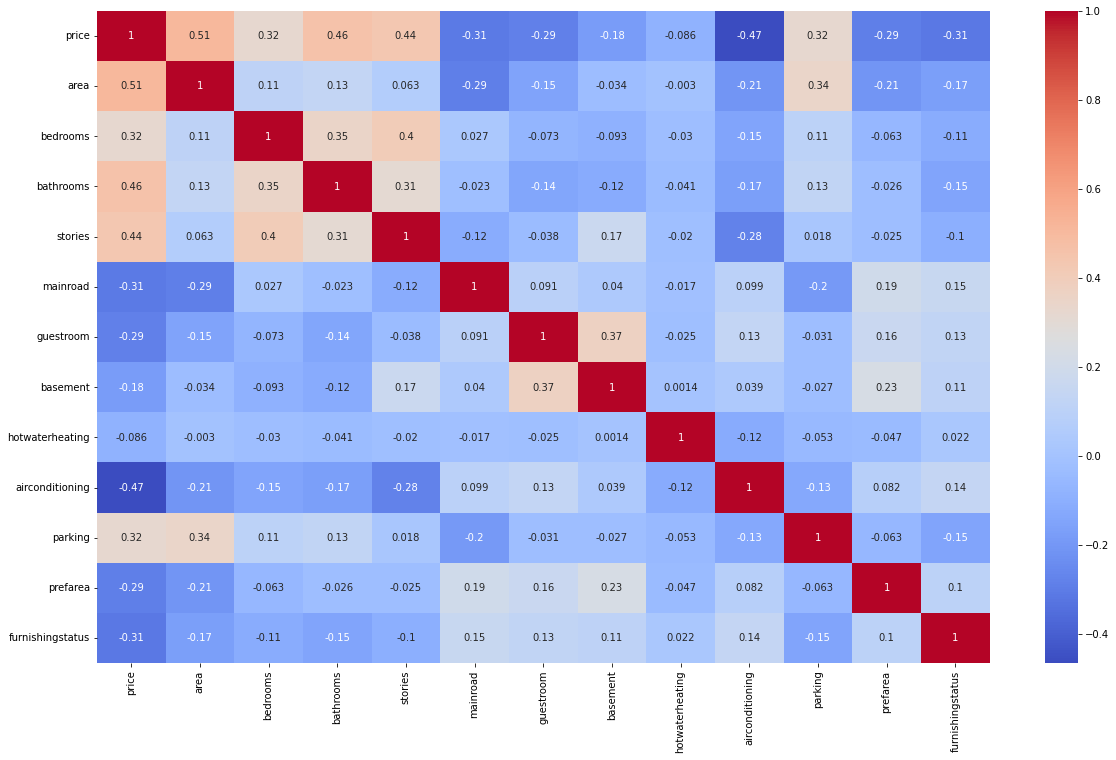

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Correlation w. r. to Target Feature (Price)

In [ ]:
data.corr()['price']

price               1.000000
area                0.511606
bedrooms            0.322992
bathrooms           0.460666
stories             0.436585
mainroad           -0.311132
guestroom          -0.286746
basement           -0.184500
hotwaterheating    -0.086425
airconditioning    -0.466092
parking             0.323426
prefarea           -0.290853
furnishingstatus   -0.314426
Name: price, dtype: float64

# Model Training

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,0,1,1,1,0,2,1,0
18,8890000,4600,3,2,2,0,0,1,1,0,2,1,0
19,8855000,6420,3,2,2,0,1,1,1,0,1,0,1
20,8750000,4320,3,1,2,0,1,0,0,1,2,1,1
21,8680000,7155,3,2,1,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0


In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

y = data['price']

In [ ]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8500,3,2,4,0,1,1,1,0,2,1,0
18,4600,3,2,2,0,0,1,1,0,2,1,0
19,6420,3,2,2,0,1,1,1,0,1,0,1
20,4320,3,1,2,0,1,0,0,1,2,1,1
21,7155,3,2,1,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,1,1,2,1,2
541,2400,3,1,1,1,1,1,1,1,0,1,1
542,3620,2,1,1,0,1,1,1,1,0,1,2
543,2910,3,1,1,1,1,1,1,1,0,1,0


In [ ]:
y

17     8960000
18     8890000
19     8855000
20     8750000
21     8680000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 528, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
541,2400,3,1,1,1,1,1,1,1,0,1,1
172,8400,3,1,2,0,0,0,1,0,2,0,2
386,3850,3,1,1,0,1,1,1,1,2,1,2
86,6670,3,1,3,0,1,0,1,1,0,0,2
384,4500,2,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,7410,3,1,1,0,0,0,1,0,2,0,2
123,7320,4,2,2,0,1,1,1,1,0,1,0
287,5500,3,1,2,0,1,1,1,0,0,1,2
452,9000,3,1,2,0,1,1,1,1,2,1,1


In [ ]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
175,9800,4,2,2,0,0,1,1,1,2,1,1
412,2610,3,1,2,0,1,0,1,1,0,0,2
23,4560,3,2,2,0,0,0,1,0,1,1,0
434,3792,4,1,2,0,1,1,1,1,0,1,1
96,9000,3,1,1,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
524,3264,2,1,1,0,1,1,1,1,0,1,2
261,3510,3,1,2,0,1,1,1,1,0,1,1
201,4095,3,1,2,1,0,0,1,0,0,1,1
337,2145,4,2,1,0,1,0,1,1,0,0,2


In [ ]:
y_train

541    1767150
172    5250000
386    3535000
86     6510000
384    3570000
        ...   
88     6475000
123    5950000
287    4200000
452    3150000
119    5950000
Name: price, Length: 422, dtype: int64

In [ ]:
y_test

175    5250000
412    3430000
23     8645000
434    3290000
96     6300000
        ...   
524    2380000
261    4473000
201    4900000
337    3920000
278    4277000
Name: price, Length: 106, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
y_train

541    1767150
172    5250000
386    3535000
86     6510000
384    3570000
        ...   
88     6475000
123    5950000
287    4200000
452    3150000
119    5950000
Name: price, Length: 422, dtype: int64

In [ ]:
y_train_pred

array([2463183.94252206, 6627819.58264274, 3357522.7331149 ,
       5084048.02599902, 3024867.96456206, 4702514.49004575,
       4069234.97777491, 4415458.581283  , 4383593.0926881 ,
       3674831.67492029, 5842371.48555433, 3129416.85261706,
       3553091.67169307, 5019613.61908533, 4466244.70058121,
       3534737.4132998 , 5802626.89242863, 3966830.70934407,
       6770212.54683003, 5650657.59001339, 2914242.57008041,
       3704003.92193888, 3110353.8332123 , 4709146.0820949 ,
       3806043.30285112, 3171953.44385009, 7062191.90372906,
       4421830.4441438 , 6611761.38242422, 4353746.26172839,
       3322268.7044994 , 3289385.582405  , 3851732.49047718,
       4130916.58893412, 6757788.0771546 , 2886611.24302669,
       7302983.01230973, 4451083.54610588, 4596895.4751266 ,
       4013286.08233398, 3745633.66203308, 5533945.48835888,
       4102482.89246461, 4769240.37932601, 3922020.86154075,
       4033618.39741899, 4710789.84955641, 3457765.43221641,
       5096490.82564924,

In [ ]:
y_test

175    5250000
412    3430000
23     8645000
434    3290000
96     6300000
        ...   
524    2380000
261    4473000
201    4900000
337    3920000
278    4277000
Name: price, Length: 106, dtype: int64

In [ ]:
y_test_pred

array([6406131.22045313, 3859654.9833718 , 6471476.78708247,
       3647455.13799245, 5259545.04092503, 4142413.78731642,
       3423078.84109464, 2366401.08239343, 4057998.62089116,
       6231088.39025318, 4362044.62127553, 5403800.87901998,
       6299792.26061596, 3566436.48762671, 5554429.39026064,
       4426276.11480234, 6294971.50426459, 5780300.46995724,
       3432063.10661957, 5239598.31434669, 6288946.55624215,
       4377137.75506543, 3943250.28058502, 3215475.86676877,
       4053959.06097079, 5431774.57322187, 3724807.39919941,
       5844852.646678  , 4687184.11911607, 4368320.80850926,
       6745221.54838244, 5714832.77917246, 4733022.47720241,
       3323295.9621809 , 6946002.39396726, 4160659.74743255,
       3525709.48443704, 4016755.80064737, 7614010.70199085,
       5483656.57788156, 6709551.6668007 , 4608973.54628613,
       4026071.32490551, 3456622.67619244, 5072926.47353573,
       2755359.75824488, 4673795.2421928 , 5021694.8285544 ,
       4915512.38551478,

In [ ]:
model.coef_

array([ 1.97366622e+02,  4.43047224e+04,  7.79711507e+05,  4.23084558e+05,
       -4.42147577e+05, -4.35657461e+05, -2.98870826e+05, -7.75239598e+05,
       -8.32225947e+05,  1.78764225e+05, -3.82439927e+05, -1.91518839e+05])

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
area,197.366622
bedrooms,44304.722364
bathrooms,779711.507050
stories,423084.558069
mainroad,-442147.577474
guestroom,-435657.461473
basement,-298870.826321
hotwaterheating,-775239.597847
airconditioning,-832225.947415
parking,178764.225045


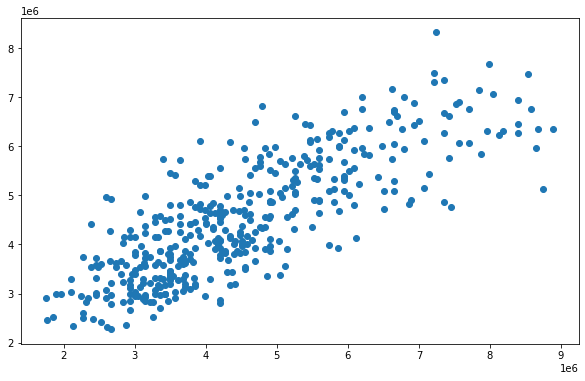

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)

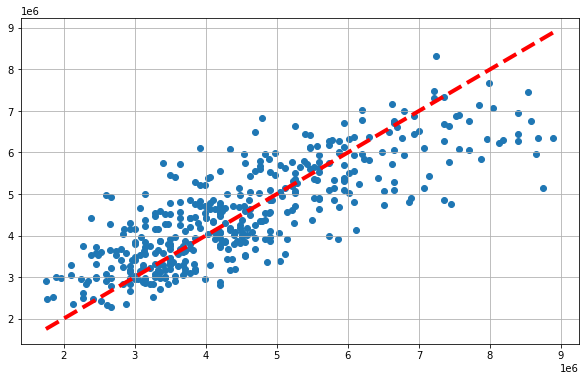

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4, color = 'r' )
plt.grid()
plt.show()

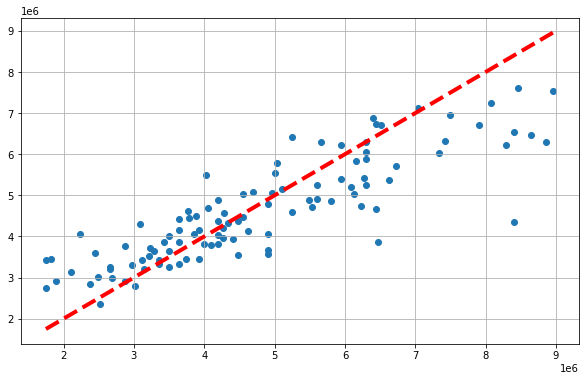

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color = 'r' )
plt.grid()
plt.show()

# For Training Data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_train, y_train_pred)

800093379962.1992

In [ ]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

894479.3904625188

In [ ]:
mean_absolute_error(y_train, y_train_pred)

682092.8767870738

In [ ]:
r2_score(y_train, y_train_pred)

0.6504095999040787

In [ ]:
def training_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')    
    print(f'MAE: {mae}')    
    print(f'R2_Score: {r2}')    

In [ ]:
print('Training Set Evaluation: ', '\n----------------------------------')
training_evaluation(y_train, y_train_pred)

Training Set Evaluation:  
----------------------------------
MSE: 800093379962.1992
RMSE: 894479.3904625188
MAE: 682092.8767870738
R2_Score: 0.6504095999040787


# For Test Data

In [ ]:
mean_squared_error(y_test, y_test_pred)

932014151669.4839

In [ ]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

965408.800285912

In [ ]:
mean_absolute_error(y_test, y_test_pred)

716425.1554054691

In [ ]:
r2_score(y_test, y_test_pred)

0.7059449391071861

In [ ]:
def test_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')    
    print(f'MAE: {mae}')    
    print(f'R2_Score: {r2}')    

In [ ]:
print('Training Set Evaluation: ', '\n----------------------------------')
test_evaluation(y_test, y_test_pred)

Training Set Evaluation:  
----------------------------------
MSE: 932014151669.4839
RMSE: 965408.800285912
MAE: 716425.1554054691
R2_Score: 0.7059449391071861
